<center>
    <h1 style = "font-family:Garamond;color:red;font-size:30px;"> Operational Research using Julia  </h1>
 <br>
    <div style="background-color:#1c87c9;">
    <img src="https://jump.dev/JuMP.jl/stable/assets/logo-dark-with-text.svg" alt="My dog" style="width:200px; height:180px">  
    </div>   
<br>    
     <h2>
         Hector Flores Callisaya
     </h2>
    
</center>


<center>
    <h2 style = "font-family:Garamond;color:red;font-size:30px;"> Content </h2>
 <br>   
    
<br>    
    
    
</center>


<div style="color:red;font-size:20px;">
<br>    
<br>    
    
  - Introduction
  - JuMP       
    
</div>    
    
    


#  🔢 Simple Linear Programming Problem 

## <a id="problem1"> Problem </a>

$$
\begin{array}{ccc}
\max & 5 x_1 + 4 x_2 &  \\
s.j. & 6x_1 + 4x_2 & \leq 24  \\
     &  x_1 + 2x_2 & \leq 6 \\ 
     &  -x_1 + x_2 & \leq 1 \\      
    &         x_2 & \leq 2 \\           
     &  x_{1},x_{2} \geq 0. 
\end{array}
$$


## 📗 <a href="https://www.geogebra.org/m/bheah8e8"> The Grafical Method </a>


## 📗  Using solver GLPK


In [1]:
]st

Project LinearProg v0.1.0
Status `~/fchectU/machaca/julMY/LinearProg/Project.toml`
  [336ed68f] CSV v0.10.7
  [861a8166] Combinatorics v1.0.2
  [a93c6f00] DataFrames v1.4.3
  [60bf3e95] GLPK v1.1.0
  [7073ff75] IJulia v1.23.3
  [4076af6c] JuMP v1.4.0
  [91a5bcdd] Plots v1.36.6
  [37e2e46d] LinearAlgebra
  [de0858da] Printf


In [2]:
using Pkg

In [3]:
#Pkg.add("DataFrames") #csv

In [4]:
using JuMP, GLPK, Plots, Combinatorics, LinearAlgebra, CSV, DataFrames  

### 🅰 <a href="#problem1"> Method 1 </a> 

In [5]:
#  Preparing an optimization model  
m = Model(GLPK.Optimizer)

# definisão da variavies 
@variable(m, xe>= 0)
@variable(m, xi>= 0)

#definição da função  objetivo
@objective(m, Max, 5xe+ 4xi )

#adicionando restrição
@constraint(m, M1,6xe+4xi<=24)
@constraint(m, M2, xe+2xi<=6)
@constraint(m, mercado, -xe +xi<=1)
@constraint(m, demanda,   xi<=2)

print(m)

println("#"^20)

@time JuMP.optimize!(m)

#Mostrando a solução otima 
println("#"^20)
println(JuMP.raw_status(m))
println("#"^20)

println("Optimal Solution:")
println("xe= ", JuMP.value(xe))
println("xi= ", JuMP.value(xi))
println("Optimal Value= ",objective_value(m))

#printing the optimal dual variable 
println("Dual Variable: ")
println("M1 = ",JuMP.value(M1))
println("M2 = ",JuMP.value(M2))
println("Mercado= ",JuMP.value(mercado))
println("demanda = ",JuMP.value(demanda))

#more information 
println("#"^20)


####################
  5.850485 seconds (6.91 M allocations: 498.120 MiB, 4.49% gc time, 99.97% compilation time)
####################
Solution is optimal
####################
Optimal Solution:
xe= 3.0
xi= 1.4999999999999998
Optimal Value= 21.0
Dual Variable: 
M1 = 24.0
M2 = 6.0
Mercado= -1.5
demanda = 1.4999999999999998
####################


### 🅱 <a href="#problem1"> Method 2 </a> 

In [6]:
#  Preparing an optimization model  
c = [5;4]
A = [6 4;
    1 2 ;
    -1 1;
     0 1 ]
b = [24;6; 1;2]

m = Model(GLPK.Optimizer)
@variable(m,x[1:2]>=0)
@objective(m,Max,sum(c[i]*x[i] for i in 1:2))
@constraint(m,rest[j in 1:4], sum(A[j,i]*x[i] for i in 1:2)<= b[j])

print(m)

JuMP.optimize!(m)
println("Optimal Solutions: ")
for i in 1:2
    println("x[$i]=",JuMP.value(x[i]))
end

println("Dual variable: ")
for i in 1:4
    println("y[$i]=",JuMP.value(rest[i]))
end


Optimal Solutions: 
x[1]=3.0
x[2]=1.4999999999999998
Dual variable: 
y[1]=24.0
y[2]=6.0
y[3]=-1.5
y[4]=1.4999999999999998


### <a href="#problem1"> Method 3 </a> 

In [7]:
#  Preparing an optimization model  

c = [5;4]
A = [6 4;
    1 2 ;
    -1 1;
     0 1]
b = [24;6; 1;2]

index_var= 1:2 
index_const = 1:4


m = Model(GLPK.Optimizer)
@variable(m,x[index_var]>=0)
@objective(m,Max,sum(c[i]*x[i] for i in index_var) )
@constraint(m,rest[j in index_const], sum(A[j,i]*x[i] for i in index_var)<= b[j])

print(m)

JuMP.optimize!(m)
println("Optimal Solutions: ")
for i in index_var
    println("x[$i]=",JuMP.value(x[i]))
end

println("Dual variable: ")
for i in index_const
    println("y[$i]=",JuMP.value(rest[i]))
end


Optimal Solutions: 
x[1]=3.0
x[2]=1.4999999999999998
Dual variable: 
y[1]=24.0
y[2]=6.0
y[3]=-1.5
y[4]=1.4999999999999998


In [8]:
#  Preparing an optimization model  

c = [-2 -4 -1 0 0]'
A = [2 1  1  1 0;
     1 1 -1  0 1]
b =[10 4]

lb = [0 0 1 0 0]
ub = [4 6 4 100 100]

index_var= 1:5 
index_const = 1:2


m = Model(GLPK.Optimizer)
@variable(m,lb[i]<= x[i=index_var]<=ub[i])
@objective(m,Min,sum(c[i]*x[i] for i in index_var) )
@constraint(m,rest[j in index_const], sum(A[j,i]*x[i] for i in index_var)== b[j])

print(m)

JuMP.optimize!(m)
println("Optimal Solutions: ")
for i in index_var
    println("x[$i]=",JuMP.value(x[i]))
end
println("Optimal Value= ",objective_value(m))

Optimal Solutions: 
x[1]=0.6666666666666665
x[2]=6.0
x[3]=2.666666666666667
x[4]=0.0
x[5]=0.0
Optimal Value= -28.0


### <a href="#problem1"> Method 4 </a>   

# Linear Regression 

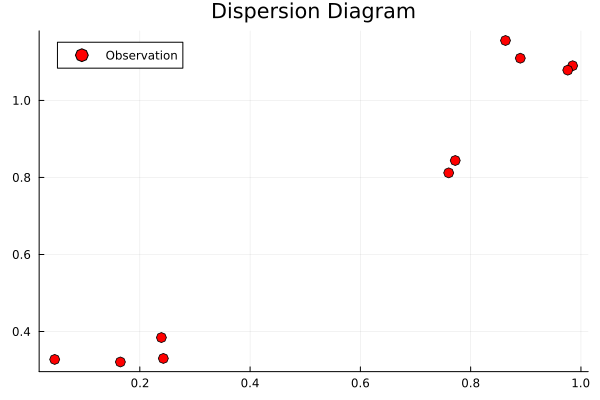

In [9]:
#xs = [1,3,4,2]
#ys = [2,2,4,3]
theme(:default)
numN = 10
xs  = rand(numN)
ys = xs + 0.3*rand(numN)
scatter(xs,ys,
markershape=:o,
    markersize=5,
    color="red",
    title= "Dispersion Diagram", 
    label="Observation",
    leg=:topleft    
)

In [10]:
m = Model(GLPK.Optimizer)
@variable(m,ρ>=0)
@variable(m,a)
@variable(m,b)
@objective(m,Min,ρ)
@constraint(m,cons1[j in 1:length(xs)], ys[j]-(a*xs[j]+b)<= ρ)
@constraint(m,cons2[j in 1:length(xs)], -ρ<= ys[j]-(a*xs[j]+b))

println("="^20)
print(m)
println("="^20)
@time JuMP.optimize!(m)
println("="^20)

println("Optimal Solutions: ")
println("$ρ=",JuMP.value(ρ))
println("$a=",JuMP.value(a))
println("$b=",JuMP.value(b))


  0.150872 seconds (35.74 k allocations: 1.857 MiB, 99.63% compilation time)
Optimal Solutions: 
ρ=0.11963739399768952
a=1.0127205137436002
b=0.1617305497634119


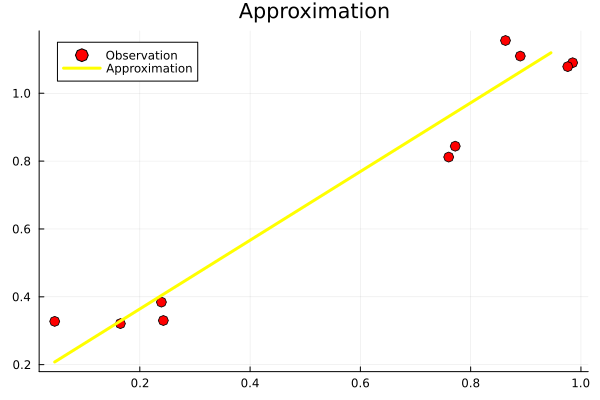

In [11]:
evalf(x)=JuMP.value(a)*x+JuMP.value(b) 

xx = minimum(xs):0.1:maximum(xs)
yy= evalf.(xx) 
scatter(xs,ys,
    markershape=:o,
    markersize=5,
    color="red",
    title="Approximation", 
    label="Observation"
    )
plot!(xx,yy,
    linewidth=3,
    linecolor=:yellow,
    label="Approximation",
    leg=:topleft    
)

In [12]:
#graph01 = DataFrame(CSV.File("data.csv",normalizenames=true));

# TSP

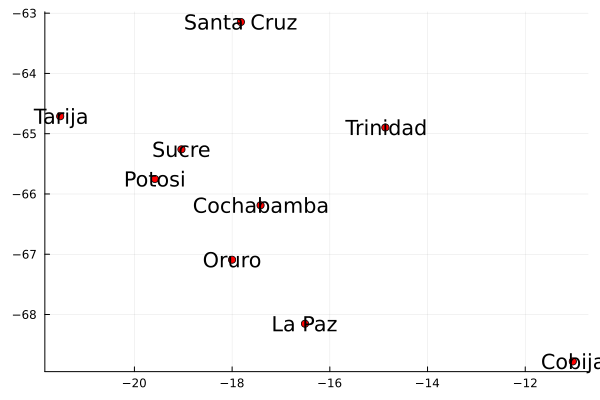

In [13]:
n = 9
P = [-16.508182696844447  -68.15269499111184;# La Paz 
    -18.001423199611615 -67.09067193509598; # Oruro 
    -19.582087542550823 -65.75043274955306; # Potosi
    -21.518827465460607 -64.71043143119411; # Tarija 
    -19.03738284477273  -65.25916220478112; # sucre 
    -17.418018136355123  -66.1867784219373;  # cochabanba 
    -14.863593795787276  -64.8963315741187; #  trinidad
    -11.02630466041903  -68.77827930725249; # Cobija 
    -17.82124335996242  -63.14603297284075; # SC        
]

cities = ["La Paz","Oruro","Potosi","Tarija","Sucre","Cochabamba","Trinidad","Cobija","Santa Cruz"] 

scatter( P[:,1], P[:,2], c=:red, leg=false, series_annotation=["$i" for i in cities])


In [14]:
function plot_route(P,X)
    n = size(X,1)
    p = scatter(P[:,1], P[:,2],c=:green, leg=false,series_annotation=["$i" for i in cities])
    for i in 1:n, j in 1:n
        if X[i,j]==1
            plot!(p, [P[i,1],P[j,1]], [P[i,2], P[j,2]],c=:red,l=:arrow,lw=:2)
        end
    end
    p
end


plot_route (generic function with 1 method)

In [15]:

c=[ norm(P[i,:]-P[j,:]) for i in 1:n, j in 1:n]

m = Model(GLPK.Optimizer) 
@variable(m,x[1:n,1:n],Bin)
@objective(m,Min,sum(c[i,j]*x[i,j] for i = 1:n,j=1:n))
@constraint(m,[i=1:n], sum(x[i,j] for j=1:n) == 1)
@constraint(m,[j=1:n], sum(x[i,j] for i=1:n) == 1)
for S ∈ combinations(1:n)
    lenS = length(S)
    if lenS ==n  
        break 
    end
    @constraint(m,sum(x[i,j] for i in S, j in S)<= lenS - 1)
end
#print(m)
@time JuMP.optimize!(m)
X = round.(Int,value.(x))



  0.260046 seconds (67.48 k allocations: 4.020 MiB, 96.52% compilation time)


9×9 Matrix{Int64}:
 0  0  0  0  0  0  0  1  0
 1  0  0  0  0  0  0  0  0
 0  0  0  0  1  0  0  0  0
 0  0  1  0  0  0  0  0  0
 0  0  0  0  0  1  0  0  0
 0  1  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  1
 0  0  0  0  0  0  1  0  0
 0  0  0  1  0  0  0  0  0

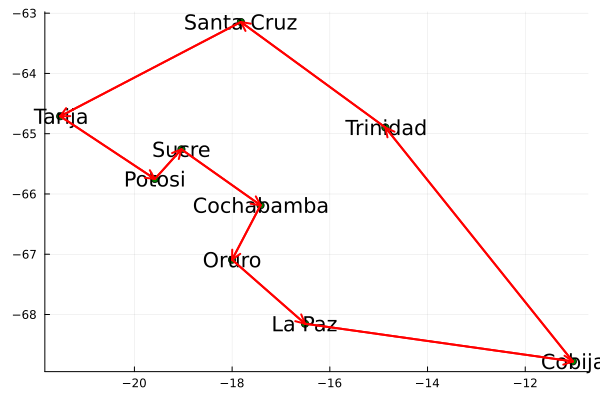

In [16]:
plot_route(P,X) 

# Graph  Coloring 

In [17]:
Ad = DataFrame(CSV.File("matAd.csv"));

In [18]:
a=Ad[1:end,2:end]

Row,La Paz,Oruro,Potosi,Tarija,Chuquisaca,Cochabamba,Beni,Pando,Santa Cruz
,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64
1,0,1,0,0,0,1,1,1,0
2,1,0,1,0,0,1,0,0,0
3,0,1,0,1,1,1,0,0,0
4,0,0,1,0,1,0,0,0,0
5,0,0,1,1,0,1,0,0,1
6,1,1,1,0,1,0,1,0,1
7,1,0,0,0,0,1,0,1,1
8,1,0,0,0,0,0,1,0,0
9,0,0,0,0,1,1,1,0,0


In [19]:
size(a)

(9, 9)

In [20]:
n =9

#=a =[
 0  1  0  0  0  1  1  1  0;
 1  0  1  0  0  1  0  0  0;
 0  1  0  1  1  1  0  0  0;
 0  0  1  0  1  0  0  0  0;
 0  0  1  1  0  1  0  0  1;
 1  1  1  0  1  0  1  0  1;
 1  0  0  0  0  1  0  1  1;
 1  0  0  0  0  0  1  0  0;
 0  0  0  0  0  1  1  0  0
]
=#

numC = 4
m = Model(GLPK.Optimizer) 
@variable(m, x[1:n,1:numC], Bin)
@variable(m, y[1:numC], Bin)

@objective(m,Min,sum(y[i] for i in 1:numC)) 
@constraint(m,[i=1:n], sum( x[i,c] for c in 1:numC) == 1 )

for i in 1:n 
    for j in 1:n
        if a[i,j]==1
            @constraint(m,[c=1:numC],x[i,c]+x[j,c] ≤ y[c])
        end
    end
end

#print(m)


JuMP.optimize!(m)

println(primal_status(m))
println(termination_status(m))
println(objective_value(m))
#println(value(y))

X = round.(Int,value.(x))


FEASIBLE_POINT
OPTIMAL
3.0


9×4 Matrix{Int64}:
 1  0  0  0
 0  0  0  1
 1  0  0  0
 0  0  1  0
 0  0  0  1
 0  0  1  0
 0  0  0  1
 0  0  1  0
 1  0  0  0

In [21]:
color_vec = zeros(Int,n)
summ = 1  
for j in 1:numC     
    for i in 1:n                
        if X[i,j]==1       
            color_vec[i] = summ
        end        
    end     
    if maximum(X[:,j])!= 0
       summ+=1
    end            
end 
color_vec

9-element Vector{Int64}:
 1
 3
 1
 2
 3
 2
 3
 2
 1

In [22]:
color_map = [:green :blue :red :yellow] 
c_graf=DataFrame(Px=P[:,1],Py=P[:,2],colorV=color_map[color_vec],cities=Ad[:,1])

Row,Px,Py,colorV,cities
,Float64,Float64,Symbol,String15
1,-16.5082,-68.1527,green,La Paz
2,-18.0014,-67.0907,red,Oruro
3,-19.5821,-65.7504,green,Potosi
4,-21.5188,-64.7104,blue,Tarija
5,-19.0374,-65.2592,red,Chuquisaca
6,-17.418,-66.1868,blue,Cochabamba
7,-14.8636,-64.8963,red,Beni
8,-11.0263,-68.7783,blue,Pando
9,-17.8212,-63.146,green,Santa Cruz


In [23]:
c_graf[:,3:4]

Row,colorV,cities
,Symbol,String15
1,green,La Paz
2,red,Oruro
3,green,Potosi
4,blue,Tarija
5,red,Chuquisaca
6,blue,Cochabamba
7,red,Beni
8,blue,Pando
9,green,Santa Cruz


In [24]:

function plot_mapC(P,X)
    labels=P[:,3]
    n = size(X,1)
    p = scatter(P[:,1], P[:,2],
        group = labels,
        color=[:blue :green :red],
        markersize=[12 12 12],
        leg=true,
        series_annotation=["$i" for i in P[:,4]],
        markershape =[:hex :o :o],        
        title="Graph Coloring",
        legend = :topleft
    )
    for i in 1:n, j in 1:n
        if X[i,j]==1
            plot!(p, [P[i,1],P[j,1]], [P[i,2], P[j,2]],
                c=:red,
                l=:dot, 
                linealpha=2, 
                lw=:2,
                leg=false
            )
        end
    end
    p
end

#plot_mapC(c_graf,a)


plot_mapC (generic function with 1 method)

# Scheduling Problem

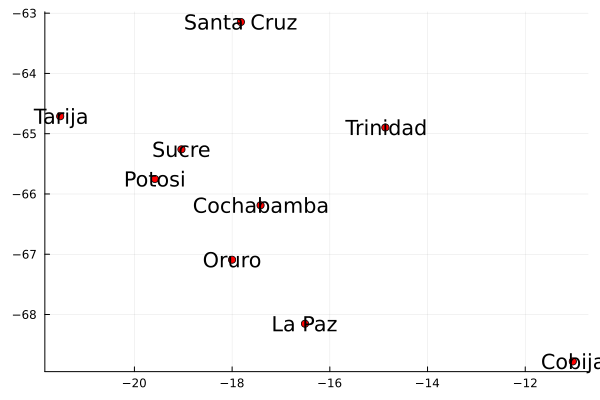

In [25]:
n = 9
P = [-16.508182696844447  -68.15269499111184;# La Paz 
    -18.001423199611615 -67.09067193509598; # Oruro 
    -19.582087542550823 -65.75043274955306; # Potosi
    -21.518827465460607 -64.71043143119411; # Tarija 
    -19.03738284477273  -65.25916220478112; # sucre 
    -17.418018136355123  -66.1867784219373;  # cochabanba 
    -14.863593795787276  -64.8963315741187; #  trinidad
    -11.02630466041903  -68.77827930725249; # Cobija 
    -17.82124335996242  -63.14603297284075; # SC        
]
cities = ["La Paz","Oruro","Potosi","Tarija","Sucre","Cochabamba","Trinidad","Cobija","Santa Cruz"] 
scatter( P[:,1], P[:,2], 
    c=:red, leg=false, 
    series_annotation=["$i" for i in cities])



In [26]:
inGraph  = Dict("La Paz"=>1,
            "Oruro"=>2,
            "Santa Cruz"=>9,
            "Tarija"=>4)

outGraph = Dict("Potosi"=>3,
                "Sucre"=>5,
                "Trinidad"=>7,
                "Cobija"=>8,
                "Cochabamba"=>6) 

nIn  = length(inGraph)
nOut = length(outGraph)
dist = zeros(nIn,nOut)

inGraph["La Paz"]
values(inGraph)
inK= keys(inGraph)

ii = 1
for (row,rval) in inGraph
    jj = 1
    for (col,cval) in outGraph        
        dist[ii,jj]= norm(P[rval,:]-P[cval,:])
        jj=jj+1
    end    
    ii=ii+1
end

allPath=zeros(Int,n,n)
for (row,rval) in inGraph    
    for (col,cval) in outGraph    
        allPath[rval,cval] =1        
    end       
end
allPath





9×9 Matrix{Int64}:
 0  0  1  0  1  1  1  1  0
 0  0  1  0  1  1  1  1  0
 0  0  0  0  0  0  0  0  0
 0  0  1  0  1  1  1  1  0
 0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0
 0  0  1  0  1  1  1  1  0

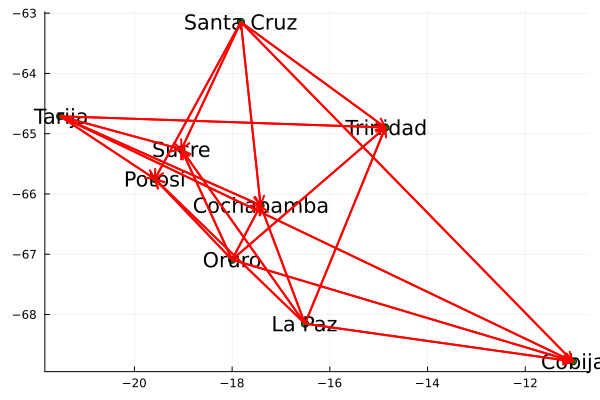

In [27]:
plot_route(P,allPath)


In [28]:
m = Model(GLPK.Optimizer) 
@variable(m,x[1:nIn,1:nOut],Bin)
@objective(m,Min,sum(dist[i,j]*x[i,j] for i=1:nIn,j=1:nOut))
@constraint(m,[i=1:nIn], sum(x[i,j] for j=1:nOut) == 1)
@constraint(m,[j=1:nOut], sum(x[i,j] for i=1:nIn) <= 1)

#print(m)
JuMP.optimize!(m)

println(primal_status(m))
println(termination_status(m))
println(objective_value(m))

X = round.(Int,value.(x))


FEASIBLE_POINT
OPTIMAL
9.360315348221226


4×5 Matrix{Int64}:
 0  0  1  0  0
 0  1  0  0  0
 1  0  0  0  0
 0  0  0  0  1

In [29]:
chPath=zeros(Int,n,n)
ii= 1
for (row,rval) in inGraph    
    jj= 1
    for (col,cval) in outGraph    
        if X[ii,jj]==1
            chPath[rval,cval] =1
        end
        jj=jj+1
    end
    ii=ii+1
end
chPath


9×9 Matrix{Int64}:
 0  0  0  0  0  0  1  0  0
 0  0  0  0  0  1  0  0  0
 0  0  0  0  0  0  0  0  0
 0  0  1  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0
 0  0  0  0  1  0  0  0  0

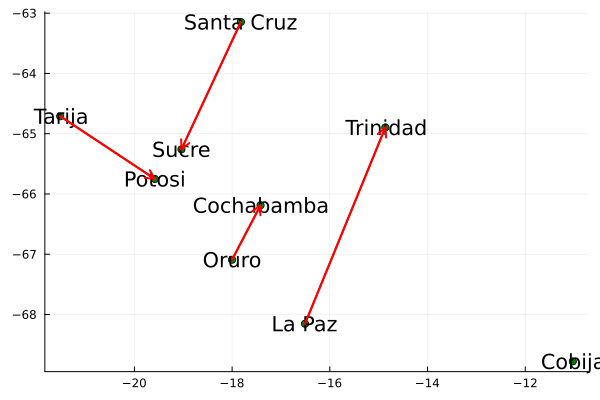

In [30]:
plot_route(P,chPath)